# Snow Depth Comparison Analysis Tool

## Overview

This script performs a comprehensive analysis of snow depth data between the Uinta Basin and Wasatch Front regions in Utah. It analyzes winter months (December through March) over multiple years, providing statistical comparisons, visualizations, and trend analysis.

## Features

- Retrieves snow depth data from multiple weather stations in two distinct regions
- Applies IQR outlier filtering to improve data quality
- Calculates daily and monthly statistics with standard errors
- Performs statistical significance testing (t-tests) between regions
- Generates time series plots and comparison charts
- Analyzes decade-long trends with significance testing
- Exports data in multiple formats (CSV, PNG, PKL)

## Requirements

- Python 3.8+
- Required packages:
  - polars
  - numpy
  - pandas
  - matplotlib
  - seaborn
  - synoptic
  - scipy

## Installation

```
pip install polars numpy pandas matplotlib seaborn synoptic scipy
```

## Usage

```python
python snow_depth_analysis.py
```

## Configuration

The script uses the following weather stations:

### Wasatch Front Stations
- KHIF (Hill Air Force Base)
- KSLC (Salt Lake City)
- UTORM (I-15 @ Orem)
- COOPPROU1 (PROVO BYU)

### Uinta Basin Stations
- COOPDSNU1 (DUCHESNE)
- COOPFTDU1 (FORT DUCHESNE)
- COOPJENU1 (JENSEN)
- COOPVELU1 (VERNAL)

## Data Processing Methodology

1. **Data Collection**: Snow depth data is retrieved from the Synoptic API for each station and month
2. **Outlier Removal**: The IQR method (k=1.5) is applied to filter out potential erroneous values
3. **Daily Aggregation**: For each day, data is averaged across all available stations within each region
4. **Statistical Analysis**: Includes t-tests, monthly statistics, and decade-long trend analysis
5. **Visualization**: Creates charts showing comparative snow depths and trends

## Output Files

For each winter period analyzed:
- `monthly_snow_depth_winter_YYYY-YYYY.png`: Monthly comparison bar chart
- `daily_snow_depth_winter_YYYY-YYYY.png`: Daily snow depth time series
- `snow_depth_data_winter_YYYY-YYYY.csv`: Raw daily data

For the entire analysis period:
- `decade_snow_depth_trends.png`: Long-term trend visualization
- `decade_snow_depth_comparison.png`: Comparative bar chart across all years
- `decade_snow_depth_summary.csv`: Summary statistics for each winter
- `snow_depth_analysis_results.pkl`: Complete analysis results in Python pickle format

## Limitations

- Data availability varies between stations and time periods
- Some stations have limited data points per month
- Statistical significance should be interpreted with caution for periods with sparse data
- Standard errors may be undetermined (nan) for some calculations

## Acknowledgments

This tool uses the Synoptic API to retrieve weather station data.

Analyzing snow depth comparison between Uinta Basin and Wasatch Front
Focusing on winter months (December-March) over a 10-year period

=== DEFINING REGIONS AND STATIONS ===

Wasatch Front Snow Depth Stations:
  KHIF (Hill Air Force Base), KSLC (Salt Lake City), UTORM (I-15 @ Orem), COOPPROU1 (PROVO BYU)

Uinta Basin Snow Depth Stations:
  COOPDSNU1 (DUCHESNE), COOPFTDU1 (FORT DUCHESNE), COOPJENU1 (JENSEN), COOPVELU1 (VERNAL)

===== ANALYZING SNOW DEPTH COMPARISON FOR Winter 2023-2024 =====

--- CREATING DAILY SNOW DEPTH DATASET FOR Winter 2023-2024 ---

Retrieving Uinta Basin snow depth data...
  Retrieving snow_depth data for Dec 2023 from COOPDSNU1 (DUCHESNE)...
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (0.29 seconds).
    Retrieved 30 records
  Retrieving snow_depth data for Jan 2024 from COOPDSNU1 (DUCHESNE)...
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (0.22 seconds).
    Retrieved 30 records

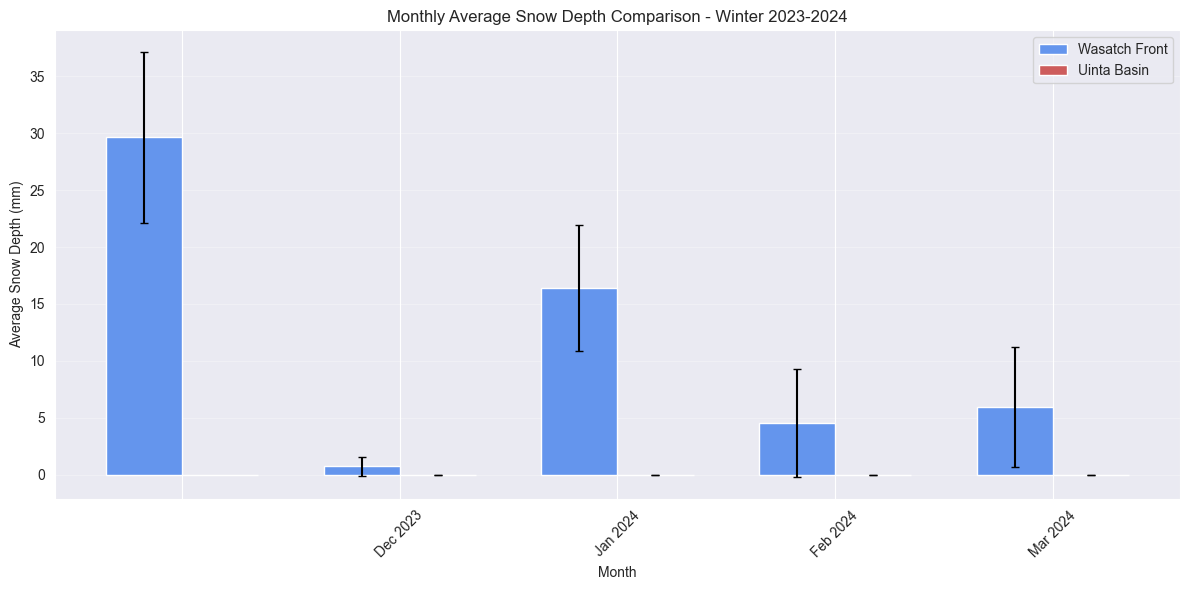

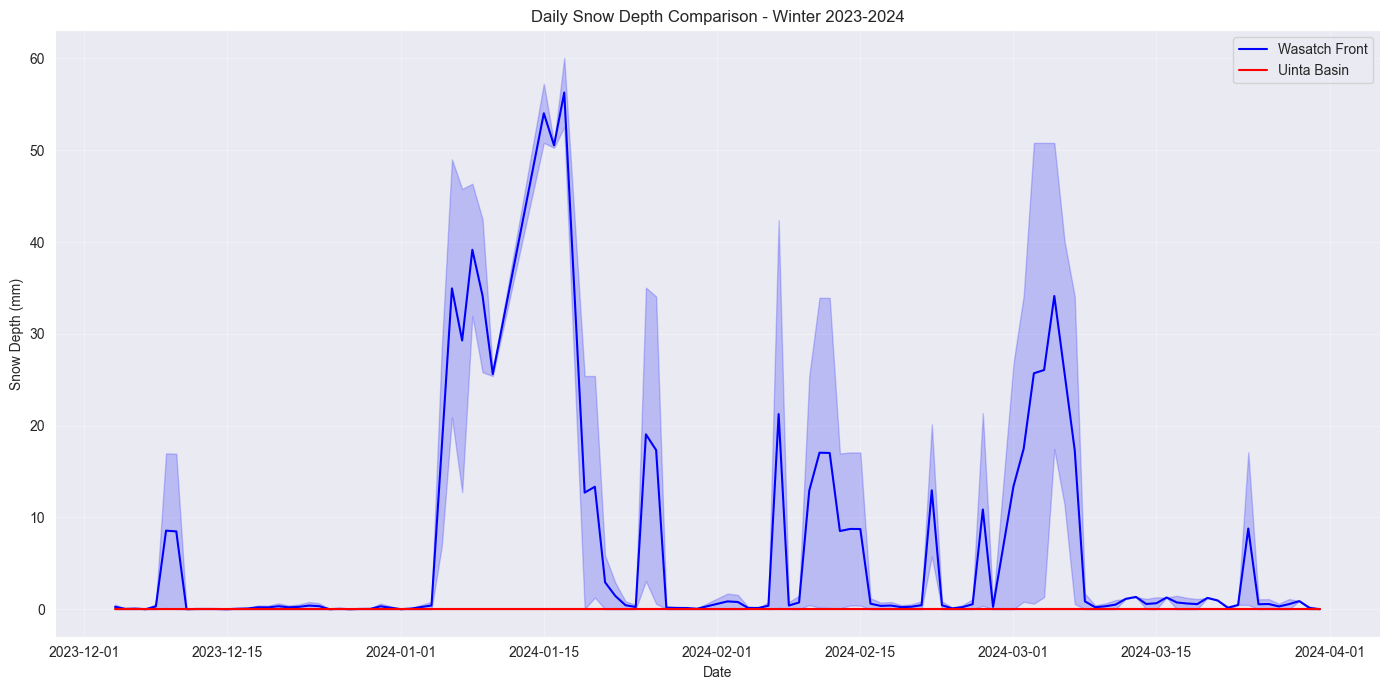

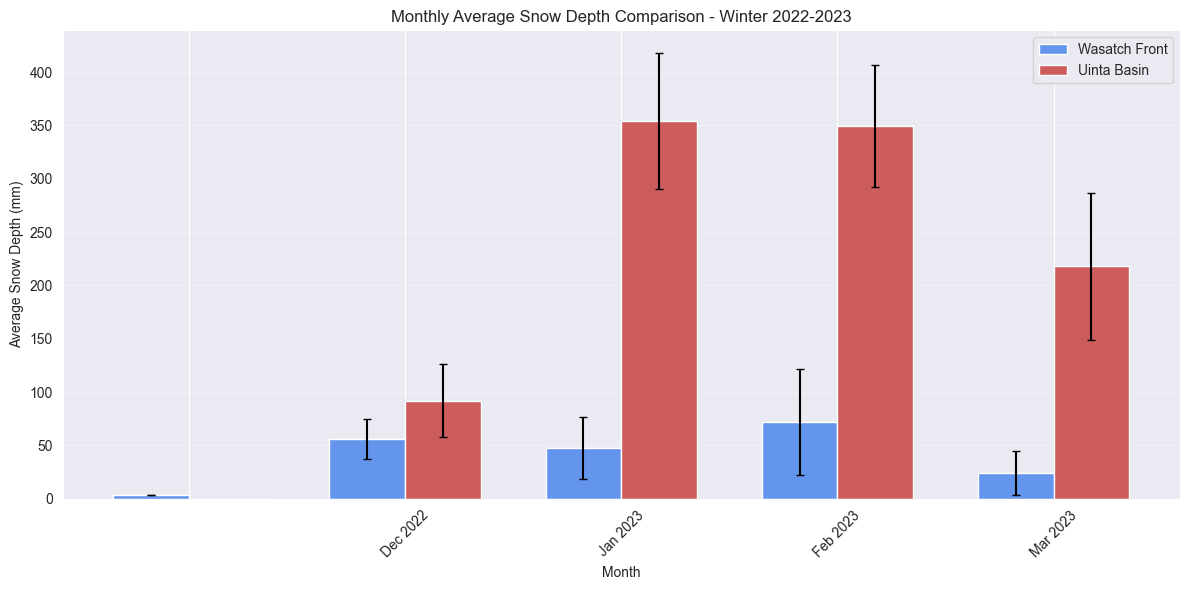

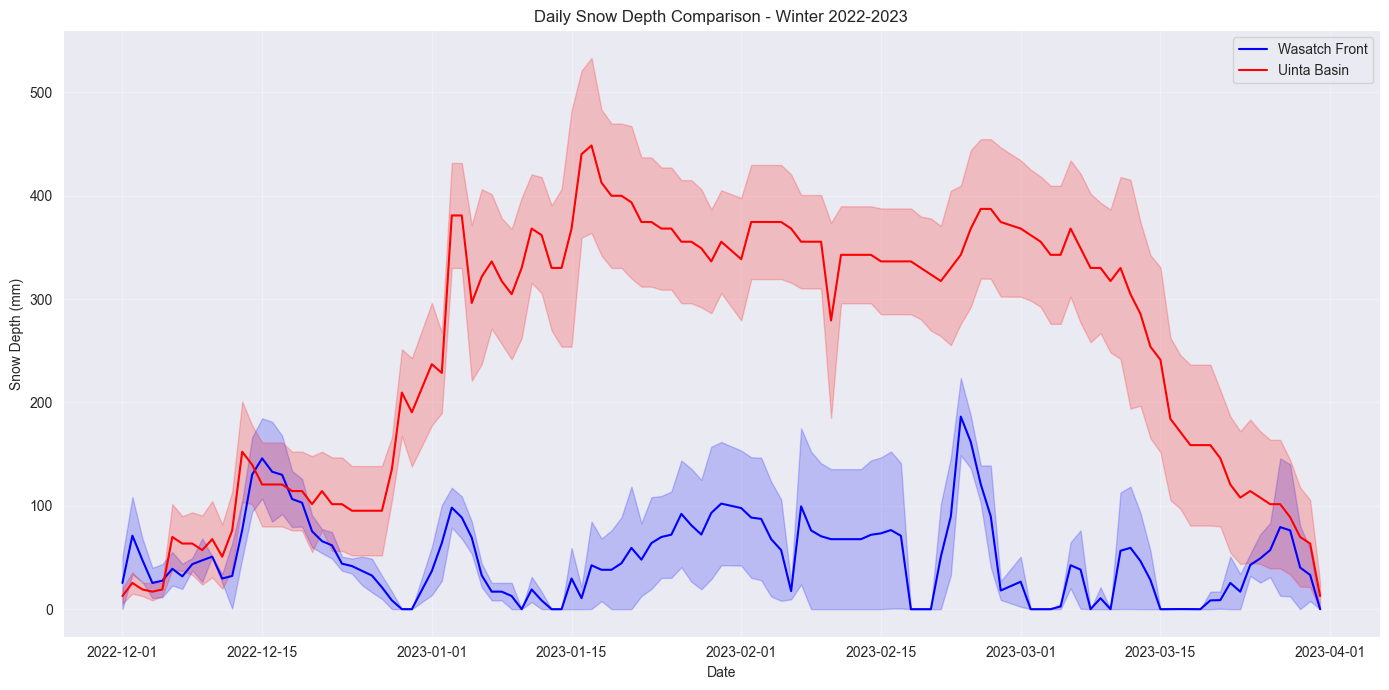

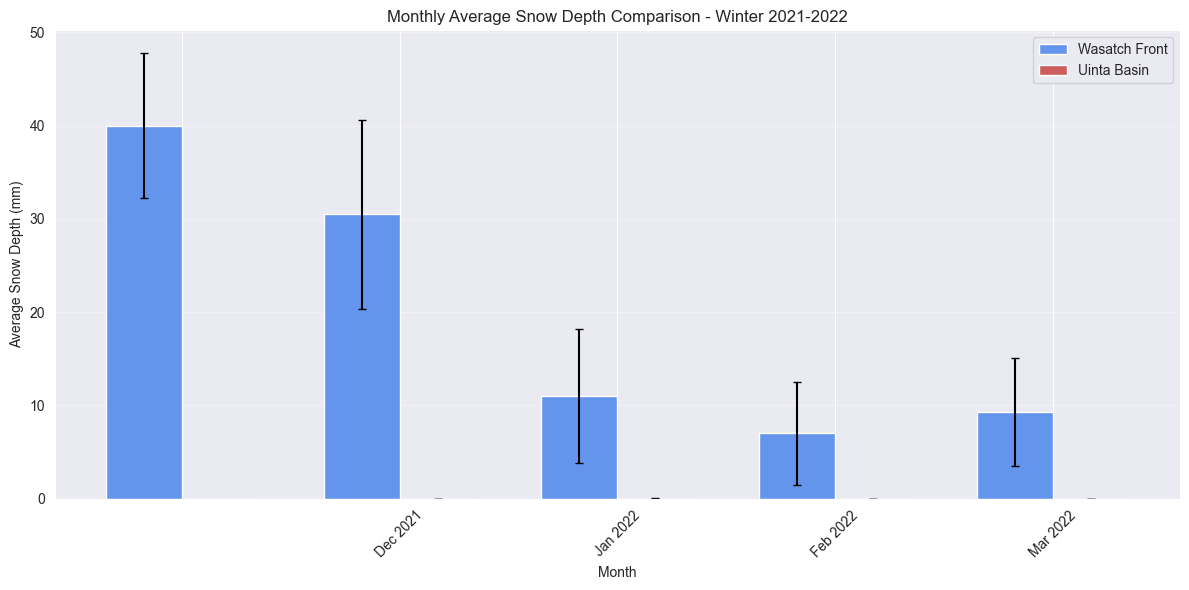

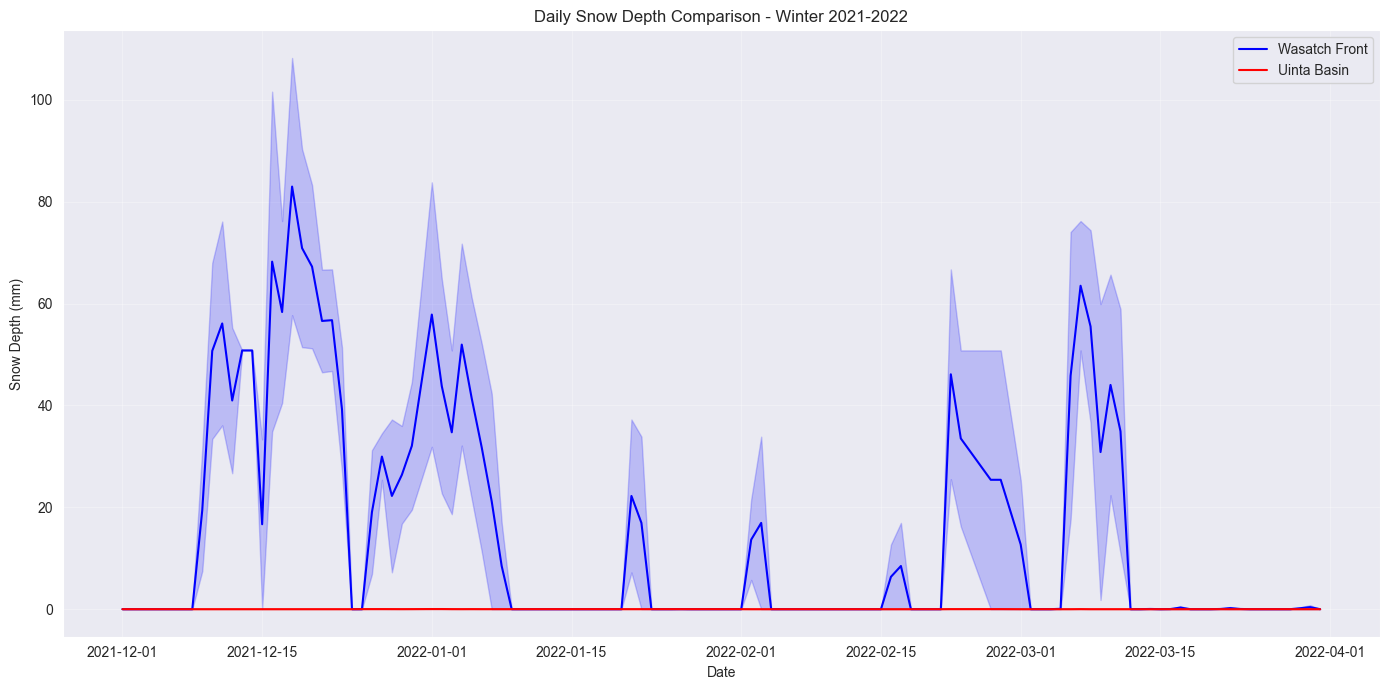

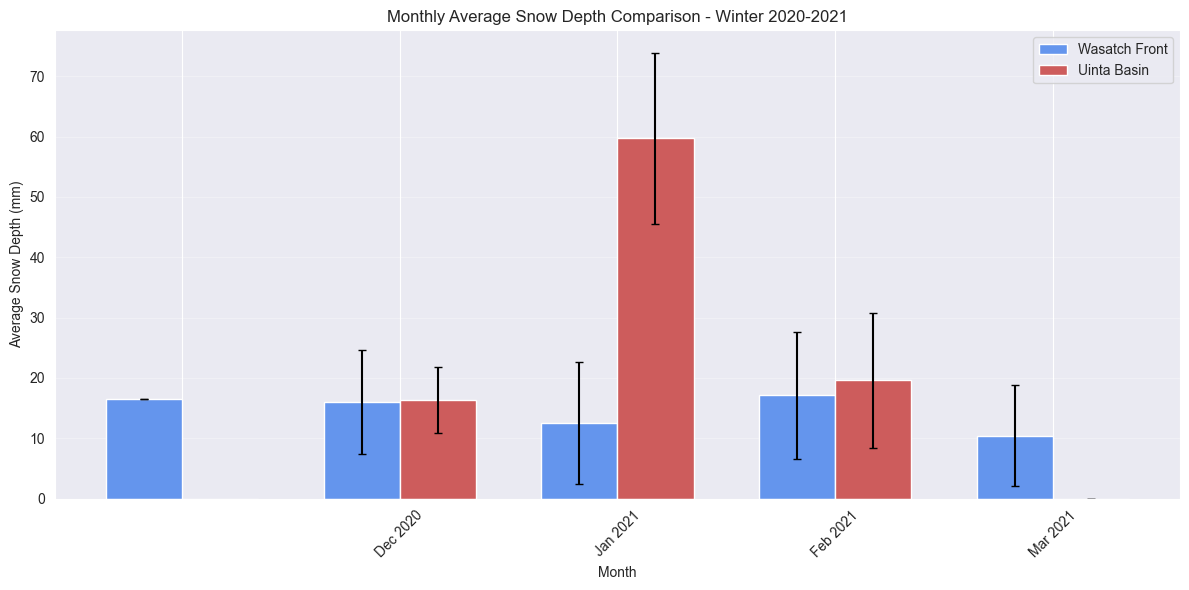

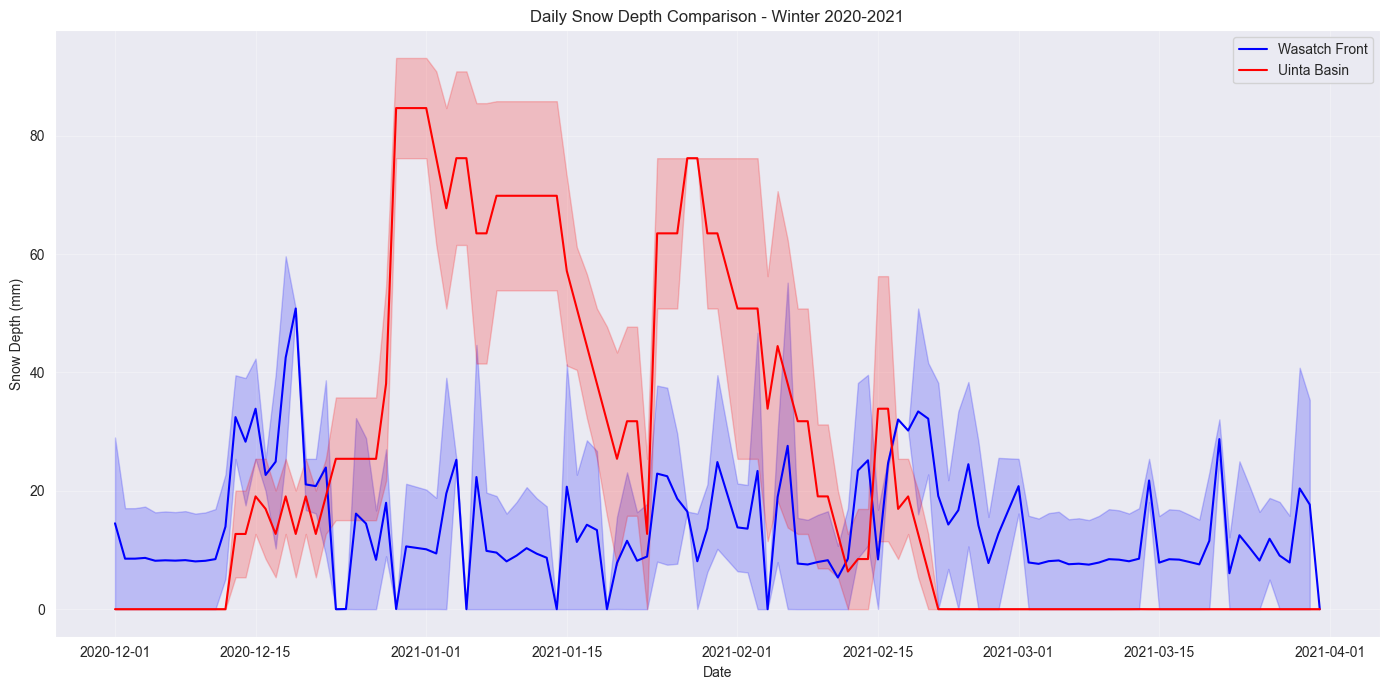

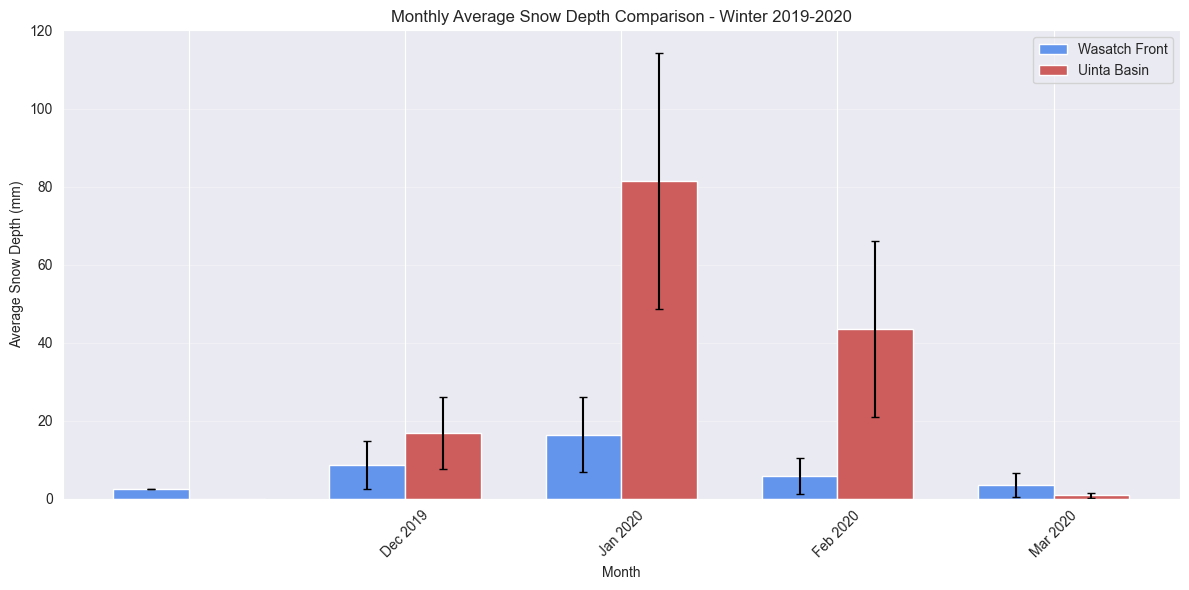

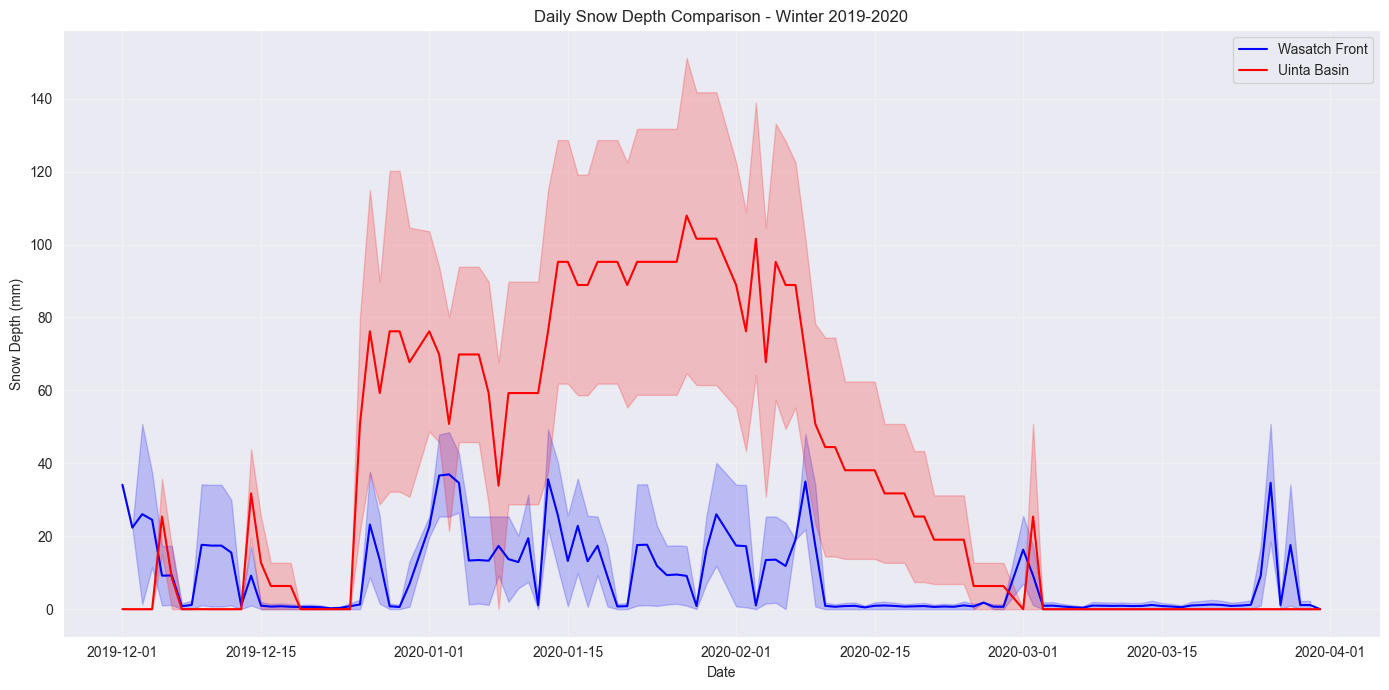

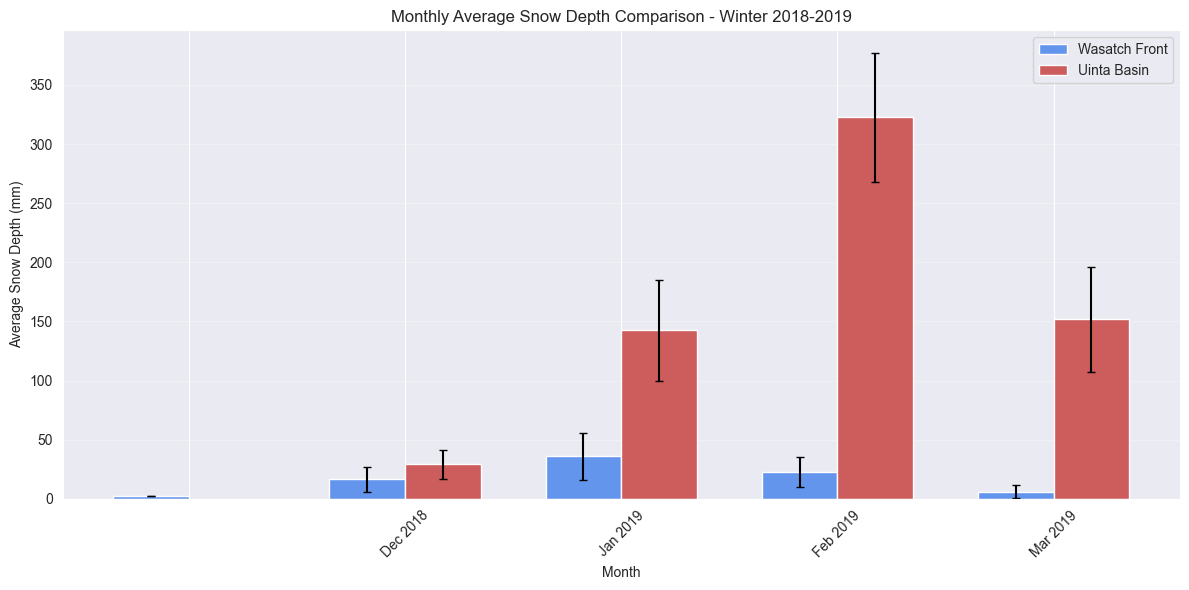

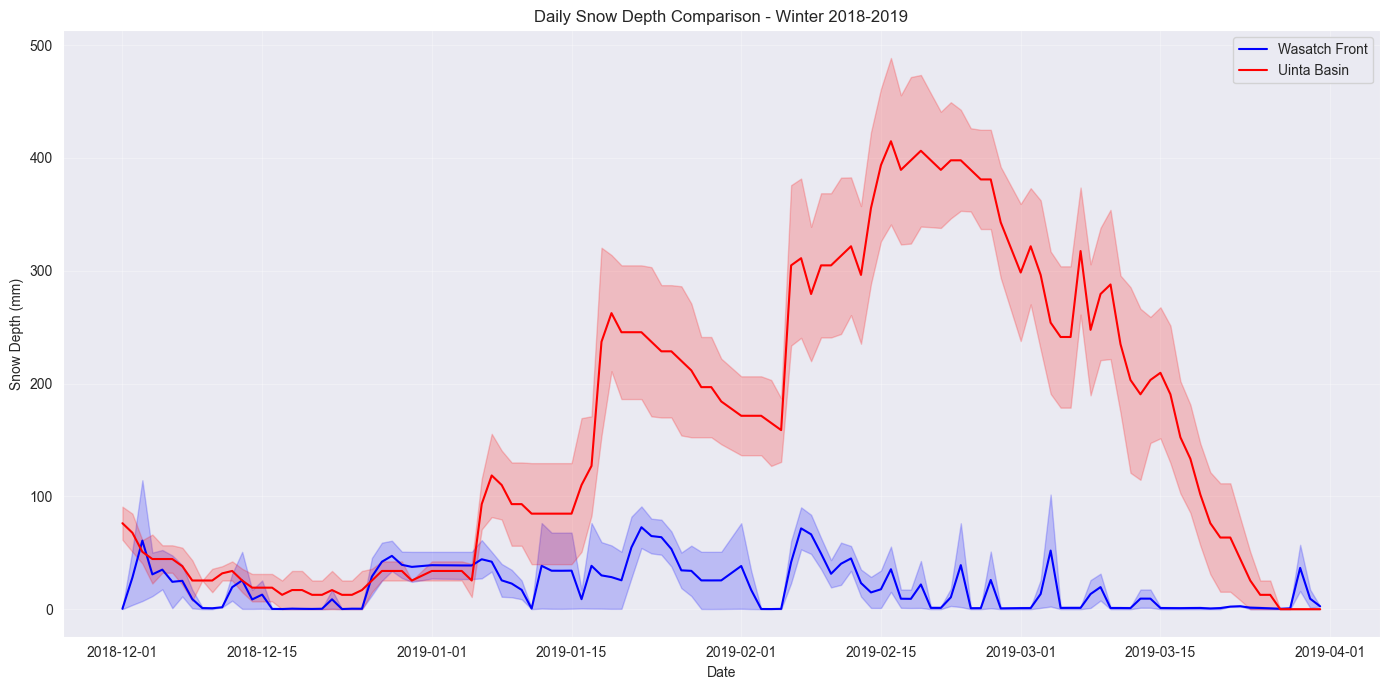

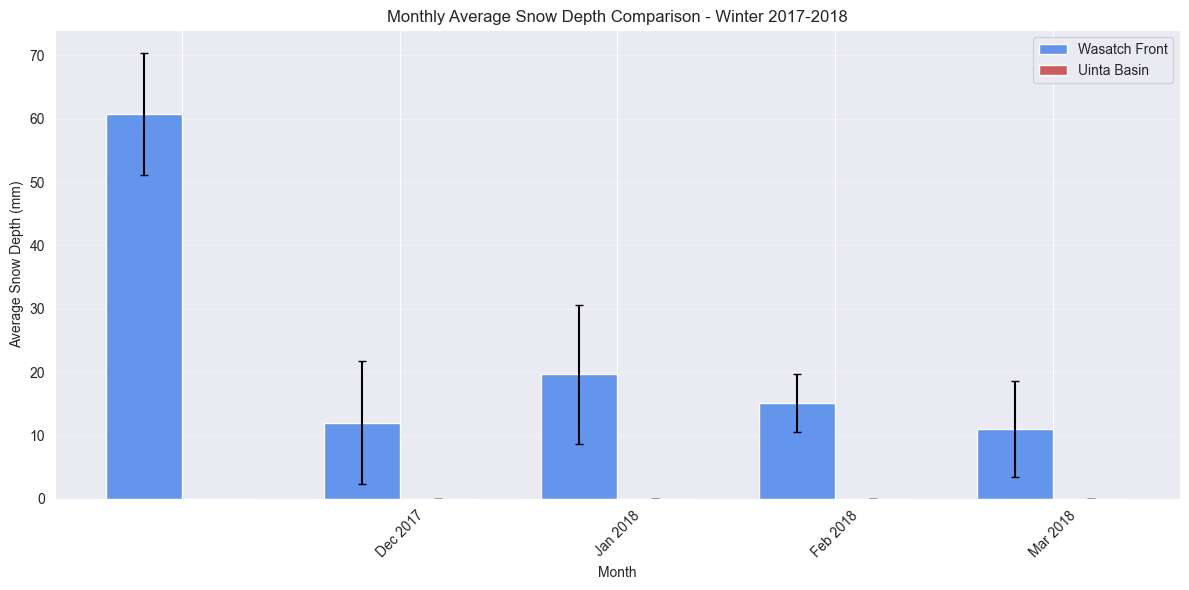

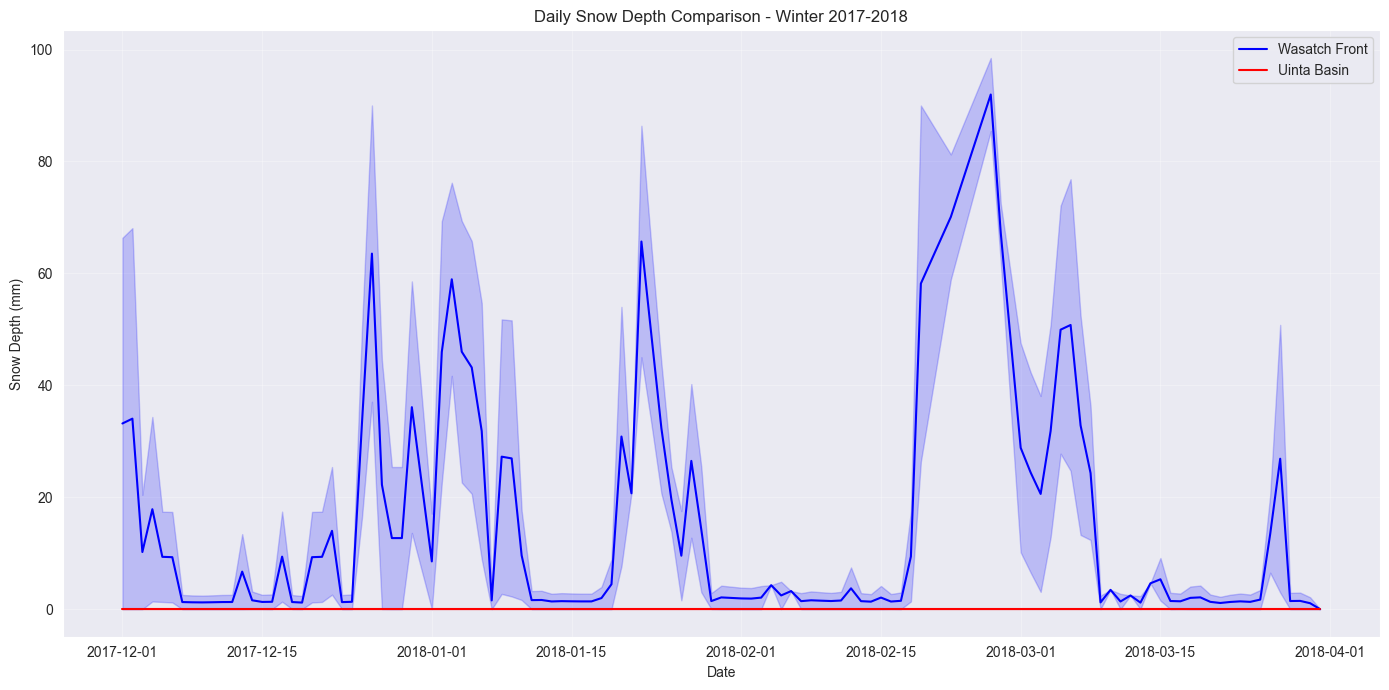

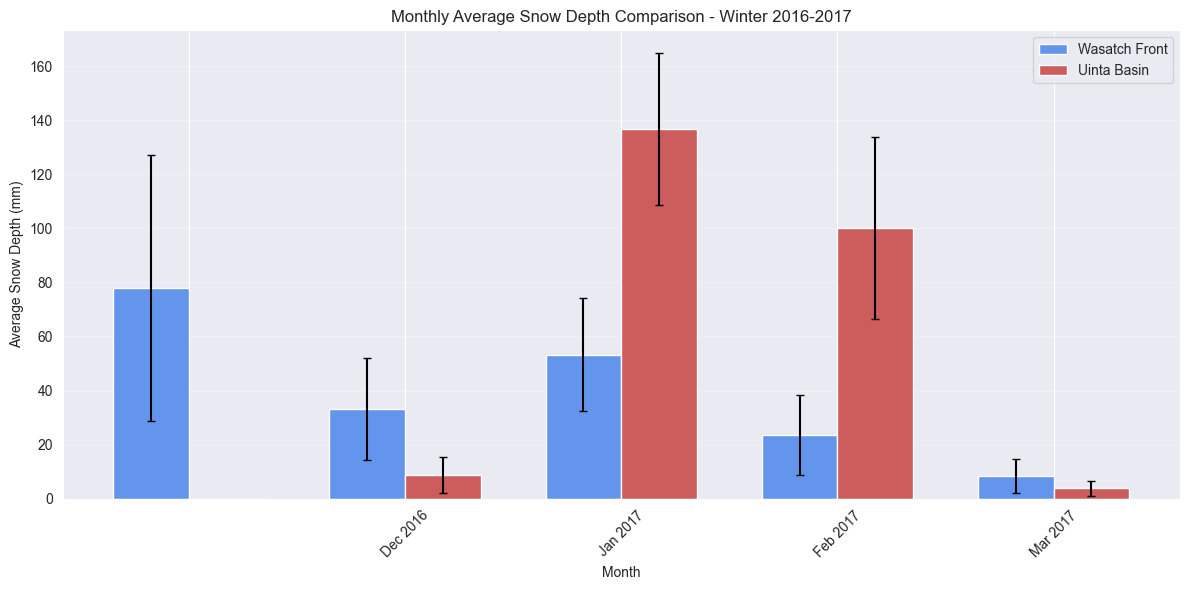

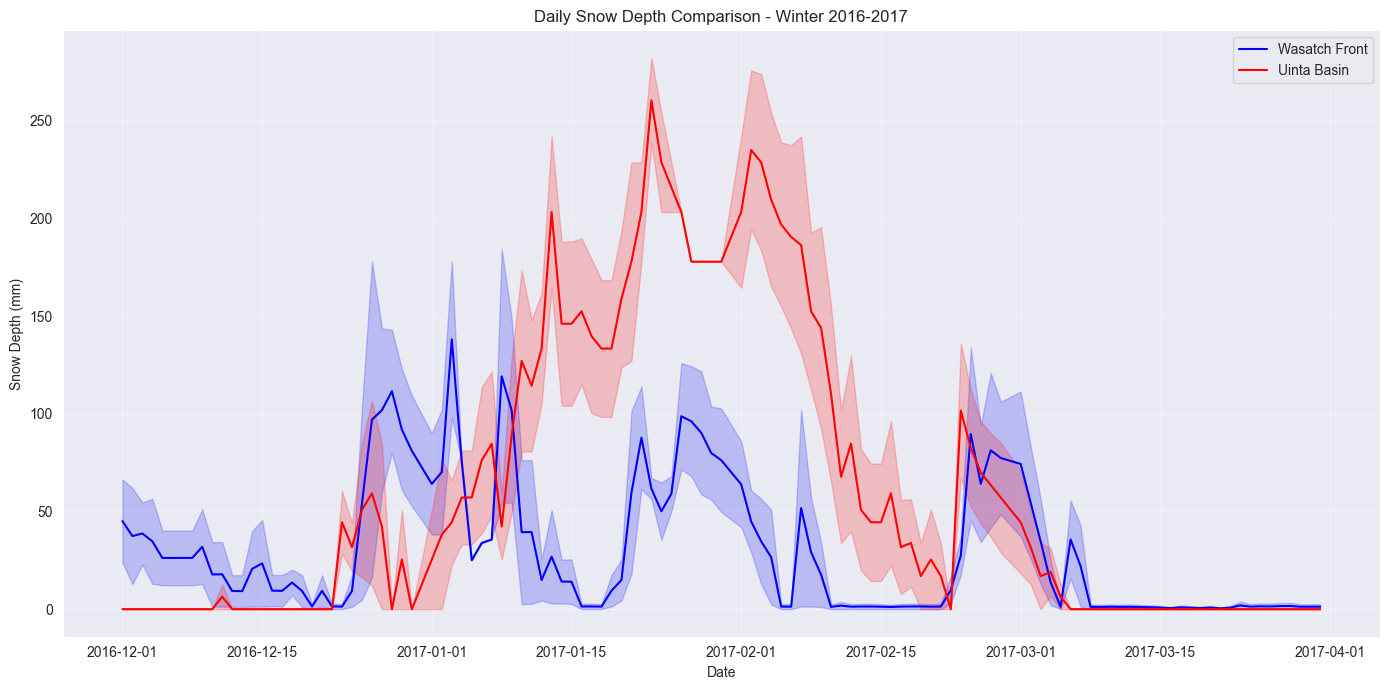

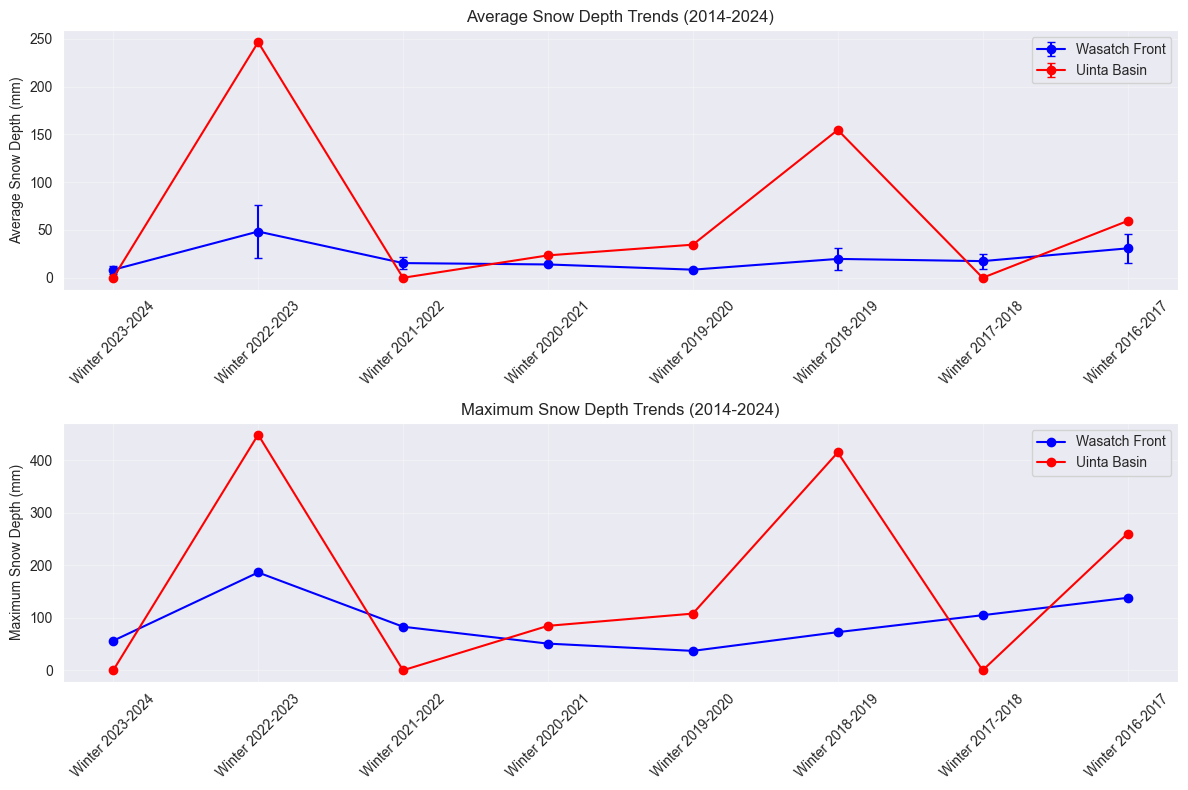

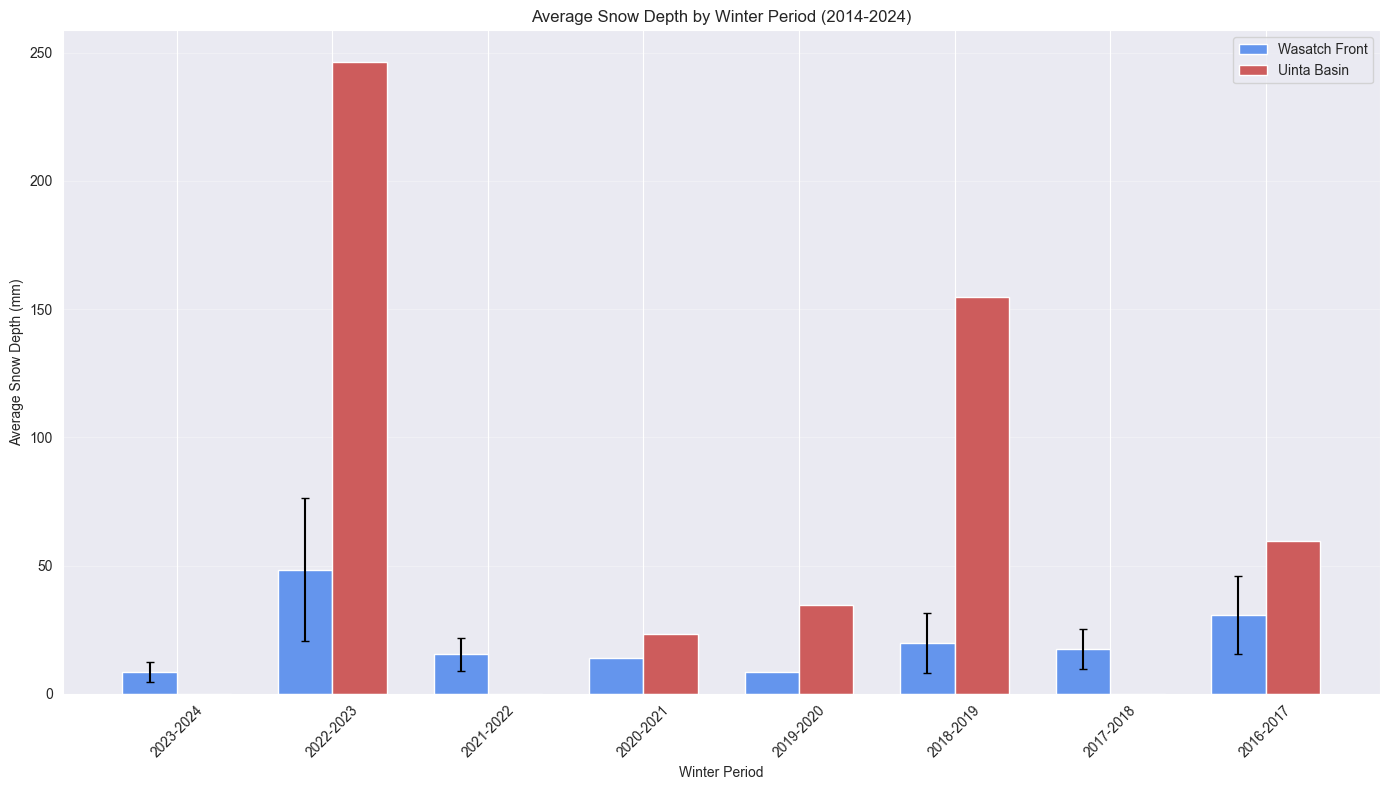

In [11]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import polars as pl
import numpy as np
import pandas as pd
import seaborn as sns
import synoptic

# Set token
token = "YOUR_TOKEN_HERE"  # Your token

# Define 10 years of winter periods to analyze (Dec-Mar only)
winter_periods = [
    # Winter 2023-2024 (current winter - changed from 2024-2025 which is in the future)
    {
    "name": "Winter 2023-2024",
    "chunks": [
        {"start": datetime(2023, 12, 1), "end": datetime(2023, 12, 31), "month": "Dec 2023"},
        {"start": datetime(2024, 1, 1), "end": datetime(2024, 1, 31), "month": "Jan 2024"},
        {"start": datetime(2024, 2, 1), "end": datetime(2024, 2, 29), "month": "Feb 2024"},
        {"start": datetime(2024, 3, 1), "end": datetime(2024, 3, 31), "month": "Mar 2024"}
        ]
    },
    # Winter 2022-2023 (previous winter)
    {
        "name": "Winter 2022-2023",
        "chunks": [
            {"start": datetime(2022, 12, 1), "end": datetime(2022, 12, 31), "month": "Dec 2022"},
            {"start": datetime(2023, 1, 1), "end": datetime(2023, 1, 31), "month": "Jan 2023"},
            {"start": datetime(2023, 2, 1), "end": datetime(2023, 2, 28), "month": "Feb 2023"},
            {"start": datetime(2023, 3, 1), "end": datetime(2023, 3, 31), "month": "Mar 2023"}
        ]
    },
    # Winter 2021-2022
    {
        "name": "Winter 2021-2022",
        "chunks": [
            {"start": datetime(2021, 12, 1), "end": datetime(2021, 12, 31), "month": "Dec 2021"},
            {"start": datetime(2022, 1, 1), "end": datetime(2022, 1, 31), "month": "Jan 2022"},
            {"start": datetime(2022, 2, 1), "end": datetime(2022, 2, 28), "month": "Feb 2022"},
            {"start": datetime(2022, 3, 1), "end": datetime(2022, 3, 31), "month": "Mar 2022"}
        ]
    },
    # Winter 2020-2021
    {
        "name": "Winter 2020-2021",
        "chunks": [
            {"start": datetime(2020, 12, 1), "end": datetime(2020, 12, 31), "month": "Dec 2020"},
            {"start": datetime(2021, 1, 1), "end": datetime(2021, 1, 31), "month": "Jan 2021"},
            {"start": datetime(2021, 2, 1), "end": datetime(2021, 2, 28), "month": "Feb 2021"},
            {"start": datetime(2021, 3, 1), "end": datetime(2021, 3, 31), "month": "Mar 2021"}
        ]
    },
    # Winter 2019-2020
    {
        "name": "Winter 2019-2020",
        "chunks": [
            {"start": datetime(2019, 12, 1), "end": datetime(2019, 12, 31), "month": "Dec 2019"},
            {"start": datetime(2020, 1, 1), "end": datetime(2020, 1, 31), "month": "Jan 2020"},
            {"start": datetime(2020, 2, 1), "end": datetime(2020, 2, 29), "month": "Feb 2020"},
            {"start": datetime(2020, 3, 1), "end": datetime(2020, 3, 31), "month": "Mar 2020"}
        ]
    },
    # Winter 2018-2019
    {
        "name": "Winter 2018-2019",
        "chunks": [
            {"start": datetime(2018, 12, 1), "end": datetime(2018, 12, 31), "month": "Dec 2018"},
            {"start": datetime(2019, 1, 1), "end": datetime(2019, 1, 31), "month": "Jan 2019"},
            {"start": datetime(2019, 2, 1), "end": datetime(2019, 2, 28), "month": "Feb 2019"},
            {"start": datetime(2019, 3, 1), "end": datetime(2019, 3, 31), "month": "Mar 2019"}
        ]
    },
    # Winter 2017-2018
    {
        "name": "Winter 2017-2018",
        "chunks": [
            {"start": datetime(2017, 12, 1), "end": datetime(2017, 12, 31), "month": "Dec 2017"},
            {"start": datetime(2018, 1, 1), "end": datetime(2018, 1, 31), "month": "Jan 2018"},
            {"start": datetime(2018, 2, 1), "end": datetime(2018, 2, 28), "month": "Feb 2018"},
            {"start": datetime(2018, 3, 1), "end": datetime(2018, 3, 31), "month": "Mar 2018"}
        ]
    },
    # Winter 2016-2017
    {
        "name": "Winter 2016-2017",
        "chunks": [
            {"start": datetime(2016, 12, 1), "end": datetime(2016, 12, 31), "month": "Dec 2016"},
            {"start": datetime(2017, 1, 1), "end": datetime(2017, 1, 31), "month": "Jan 2017"},
            {"start": datetime(2017, 2, 1), "end": datetime(2017, 2, 28), "month": "Feb 2017"},
            {"start": datetime(2017, 3, 1), "end": datetime(2017, 3, 31), "month": "Mar 2017"}
        ]
    },
]

print("Analyzing snow depth comparison between Uinta Basin and Wasatch Front")
print("Focusing on winter months (December-March) over a 10-year period")

# Define specific stations for each region - REMOVED UTPKL and UTMYT
wasatch_front_stations = {
    "snow_depth": ["KHIF", "KSLC", "UTORM", "COOPPROU1"]  # Removed UTPKL
}

uinta_basin_stations = {
    "snow_depth": ["COOPDSNU1", "COOPFTDU1", "COOPJENU1", "COOPVELU1"]  # Removed UTMYT
}

# Station name mappings
station_names = {
    # Wasatch Front
    "KHIF": "Hill Air Force Base",
    "KSLC": "Salt Lake City",
    "UTORM": "I-15 @ Orem",
    "COOPPROU1": "PROVO BYU",

    # Uinta Basin
    "COOPDSNU1": "DUCHESNE",
    "COOPFTDU1": "FORT DUCHESNE",
    "COOPJENU1": "JENSEN",
    "COOPVELU1": "VERNAL"
}

print("\n=== DEFINING REGIONS AND STATIONS ===")
print("\nWasatch Front Snow Depth Stations:")
print("  " + ", ".join([f"{id} ({station_names[id]})" for id in wasatch_front_stations['snow_depth']]))

print("\nUinta Basin Snow Depth Stations:")
print("  " + ", ".join([f"{id} ({station_names[id]})" for id in uinta_basin_stations['snow_depth']]))

# Function to filter outliers using IQR method
def filter_outliers_iqr(df, value_column, k=1.5):
    """
    Remove outliers based on IQR method (commonly used in scientific papers)
    k: multiplier for IQR (typically 1.5 or 3)
    """
    try:
        # Calculate Q1 and Q3
        q1 = df[value_column].quantile(0.25)
        q3 = df[value_column].quantile(0.75)

        # Calculate IQR
        iqr = q3 - q1

        # Define bounds
        lower_bound = q1 - k * iqr
        upper_bound = q3 + k * iqr

        # Filter values within bounds
        filtered_df = df.filter((df[value_column] >= lower_bound) & (df[value_column] <= upper_bound))

        # Report how many outliers were removed
        outliers_count = len(df) - len(filtered_df)
        if outliers_count > 0:
            print(f"    Removed {outliers_count} outliers from {value_column} using IQR method")

        return filtered_df
    except Exception as e:
        print(f"Error filtering outliers: {e}")
        return df  # Return original dataframe if error

# Function to ensure datetime objects have consistent timezone for comparisons
def standardize_date_comparison(data_df, date_obj):
    """
    Ensure datetime objects have consistent timezone for comparison
    """
    if data_df is None or len(data_df) == 0:
        return date_obj

    # Check if the DataFrame datetime has timezone info
    if "date_time" in data_df.columns:
        # Get a sample datetime from the data - using iloc for pandas
        sample_dt = data_df["date_time"].iloc[0] if len(data_df) > 0 else None

        # If the sample has timezone but our comparison date doesn't,
        # add matching timezone to the comparison date
        if sample_dt and hasattr(sample_dt, 'tzinfo') and sample_dt.tzinfo is not None and date_obj.tzinfo is None:
            # Return a new date with matching timezone
            return date_obj.replace(tzinfo=sample_dt.tzinfo)

    # Otherwise return the original date
    return date_obj

# Function to collect and merge data from multiple monthly chunks
def collect_monthly_data(station, winter, variable):
    """Collect data for a station across all months of winter period"""
    all_data = []

    for chunk in winter['chunks']:
        try:
            print(f"  Retrieving {variable} data for {chunk['month']} from {station} ({station_names[station]})...")
            data = synoptic.TimeSeries(
                stid=station,
                start=chunk['start'],
                end=chunk['end'],
                vars=variable,
                token=token
            ).df()

            if data is not None and len(data) > 0:
                all_data.append(data)
                print(f"    Retrieved {len(data)} records")
            else:
                print(f"    No data available")

        except Exception as e:
            print(f"    Error: {e}")

    # Combine all monthly chunks
    if all_data:
        try:
            combined_data = pl.concat(all_data)
            return combined_data
        except Exception as e:
            print(f"Error combining data: {e}")
            # Return the first chunk if we can't combine
            if len(all_data) > 0:
                return all_data[0]

    return None

# Function to collect data from all stations in a region
def collect_regional_data(stations, winter, variable):
    """Collect data from all stations in a region for a variable"""
    all_station_data = []
    used_stations = []

    for station in stations:
        station_data = collect_monthly_data(station, winter, variable)
        if station_data is not None and len(station_data) > 0:
            # Add station identifier column
            station_data = station_data.with_columns(pl.lit(station).alias("station"))
            all_station_data.append(station_data)
            used_stations.append(station)

    # Combine all station data
    if all_station_data:
        try:
            combined_data = pl.concat(all_station_data)
            return combined_data, used_stations
        except Exception as e:
            print(f"Error combining station data: {e}")
            return None, []

    return None, []

# Function to create daily snow depth dataset for both regions
def create_daily_snow_depth_dataset(winter):
    """
    Create a daily snow depth dataset for both regions.

    Returns:
    --------
    DataFrame with daily snow depth data for both regions
    """
    print(f"\n--- CREATING DAILY SNOW DEPTH DATASET FOR {winter['name']} ---")

    # Get data for both regions
    print(f"\nRetrieving Uinta Basin snow depth data...")
    uinta_snow, uinta_stations_used = collect_regional_data(uinta_basin_stations["snow_depth"], winter, "snow_depth")

    print(f"\nRetrieving Wasatch Front snow depth data...")
    wasatch_snow, wasatch_stations_used = collect_regional_data(wasatch_front_stations["snow_depth"], winter, "snow_depth")

    # Create daily snow depth dataset
    if uinta_snow is not None and wasatch_snow is not None:
        try:
            # Aggregate data by date (daily average)
            uinta_daily = uinta_snow.group_by(
                [pl.col("date_time").dt.date(), "station"]
            ).agg(
                pl.col("value").mean().alias("daily_snow_depth")
            )

            # Apply outlier filtering to each region's data
            print("Filtering outliers in Uinta Basin data...")
            uinta_daily = filter_outliers_iqr(uinta_daily, "daily_snow_depth")

            # Average across stations for each day with additional statistics
            uinta_region_daily = uinta_daily.group_by(
                pl.col("date_time")
            ).agg(
                pl.col("daily_snow_depth").mean().alias("uinta_basin_snow_depth"),
                pl.col("daily_snow_depth").std().alias("uinta_basin_snow_depth_std"),
                pl.col("daily_snow_depth").count().alias("uinta_basin_station_count")
            ).sort("date_time")

            wasatch_daily = wasatch_snow.group_by(
                [pl.col("date_time").dt.date(), "station"]
            ).agg(
                pl.col("value").mean().alias("daily_snow_depth")
            )

            # Apply outlier filtering
            print("Filtering outliers in Wasatch Front data...")
            wasatch_daily = filter_outliers_iqr(wasatch_daily, "daily_snow_depth")

            # Average across stations for each day with additional statistics
            wasatch_region_daily = wasatch_daily.group_by(
                pl.col("date_time")
            ).agg(
                pl.col("daily_snow_depth").mean().alias("wasatch_front_snow_depth"),
                pl.col("daily_snow_depth").std().alias("wasatch_front_snow_depth_std"),
                pl.col("daily_snow_depth").count().alias("wasatch_front_station_count")
            ).sort("date_time")

            # Join the two datasets
            daily_data = uinta_region_daily.join(
                wasatch_region_daily,
                on="date_time",
                how="full"
            )

            # Fill missing values with 0
            daily_data = daily_data.fill_null(0)

            # Rename date_time to date for clarity
            daily_data = daily_data.rename({"date_time": "date"})

            # Add winter month information
            daily_data = daily_data.with_columns(
                pl.when(pl.col("date").dt.month() == 12)
                .then(pl.lit(0))  # December
                .when(pl.col("date").dt.month() == 1)
                .then(pl.lit(1))  # January
                .when(pl.col("date").dt.month() == 2)
                .then(pl.lit(2))  # February
                .when(pl.col("date").dt.month() == 3)
                .then(pl.lit(3))  # March
                .otherwise(pl.lit(-1))
                .alias("winter_month_idx")
            )

            # Add a string version of the winter month
            daily_data = daily_data.with_columns(
                pl.when(pl.col("winter_month_idx") == 0)
                .then(pl.lit("Dec"))
                .when(pl.col("winter_month_idx") == 1)
                .then(pl.lit("Jan"))
                .when(pl.col("winter_month_idx") == 2)
                .then(pl.lit("Feb"))
                .when(pl.col("winter_month_idx") == 3)
                .then(pl.lit("Mar"))
                .otherwise(pl.lit("Unknown"))
                .alias("winter_month")
            )

            # Add the year to the winter month label
            daily_data = daily_data.with_columns(
                pl.col("date").dt.year().cast(pl.Utf8).alias("year")
            )

            # Create combined winter month label (like "Dec 2022", "Jan 2023", etc.)
            daily_data = daily_data.with_columns(
                (pl.col("winter_month") + " " + pl.col("year")).alias("winter_month_label")
            )

            # Add a column for snow depth difference
            daily_data = daily_data.with_columns(
                (pl.col("wasatch_front_snow_depth") - pl.col("uinta_basin_snow_depth")).alias("snow_depth_diff")
            )

            # Calculate standard errors
            daily_data = daily_data.with_columns(
                (pl.col("wasatch_front_snow_depth_std") / (pl.col("wasatch_front_station_count").sqrt())).alias("wasatch_front_snow_depth_se"),
                (pl.col("uinta_basin_snow_depth_std") / (pl.col("uinta_basin_station_count").sqrt())).alias("uinta_basin_snow_depth_se")
            )

            print(f"Created daily dataset with {len(daily_data)} days")
            return daily_data, uinta_stations_used, wasatch_stations_used

        except Exception as e:
            print(f"Error creating daily dataset: {e}")
            import traceback
            traceback.print_exc()
            return None, [], []
    else:
        if uinta_snow is None:
            print("No snow depth data available for Uinta Basin stations")
        if wasatch_snow is None:
            print("No snow depth data available for Wasatch Front stations")

        return None, [], []

# Function to conduct statistical tests between regions
def conduct_statistical_tests(daily_data):
    """
    Perform statistical tests to compare the two regions
    """
    from scipy import stats

    # Convert to pandas for statistical testing
    daily_pd = daily_data.to_pandas()

    # T-test for overall difference
    t_stat, p_value = stats.ttest_ind(
        daily_pd['wasatch_front_snow_depth'].values,
        daily_pd['uinta_basin_snow_depth'].values,
        equal_var=False  # Use Welch's t-test which does not assume equal variances
    )

    print("\n=== STATISTICAL TESTS ===")
    print(f"T-test comparing overall snow depth between regions:")
    print(f"  t-statistic: {t_stat:.4f}")
    print(f"  p-value: {p_value:.4f}")
    print(f"  {'Statistically significant difference (p < 0.05)' if p_value < 0.05 else 'No statistically significant difference (p >= 0.05)'}")

    # Monthly tests
    monthly_tests = []
    for month_idx in range(4):  # 0-3 for Dec-Mar
        month_data = daily_pd[daily_pd['winter_month_idx'] == month_idx]
        if len(month_data) > 0:
            month_name = ["December", "January", "February", "March"][month_idx]
            month_t, month_p = stats.ttest_ind(
                month_data['wasatch_front_snow_depth'].values,
                month_data['uinta_basin_snow_depth'].values,
                equal_var=False
            )
            monthly_tests.append({
                'month': month_name,
                't_stat': month_t,
                'p_value': month_p,
                'significant': month_p < 0.05
            })

    print("\nMonthly t-tests:")
    for test in monthly_tests:
        print(f"  {test['month']}: t={test['t_stat']:.4f}, p={test['p_value']:.4f} {'(significant)' if test['significant'] else '(not significant)'}")

    return {
        'overall': {'t_stat': t_stat, 'p_value': p_value},
        'monthly': monthly_tests
    }

# Function to analyze snow depth for a winter period
def analyze_snow_depth(winter):
    """
    Analyze snow depth patterns for a winter period.
    """
    print(f"\n===== ANALYZING SNOW DEPTH COMPARISON FOR {winter['name']} =====")

    # Create daily snow depth dataset
    daily_data, uinta_stations_used, wasatch_stations_used = create_daily_snow_depth_dataset(winter)

    if daily_data is not None and len(daily_data) > 0:
        # Print stations used
        print("\nWasatch Front Snow Depth Stations Used:")
        for station in wasatch_stations_used:
            print(f"  - {station} ({station_names[station]})")

        print("\nUinta Basin Snow Depth Stations Used:")
        for station in uinta_stations_used:
            print(f"  - {station} ({station_names[station]})")

        # Perform statistical tests
        stat_tests = conduct_statistical_tests(daily_data)

        # Calculate monthly statistics - Include winter_month_idx and year in group_by with additional statistics
        monthly_stats = daily_data.group_by(["winter_month_label", "winter_month_idx", "year"]).agg(
            pl.col("wasatch_front_snow_depth").mean().alias("wasatch_avg"),
            pl.col("uinta_basin_snow_depth").mean().alias("uinta_avg"),
            pl.col("snow_depth_diff").mean().alias("avg_diff"),
            pl.col("wasatch_front_snow_depth").max().alias("wasatch_max"),
            pl.col("uinta_basin_snow_depth").max().alias("uinta_max"),
            pl.col("wasatch_front_snow_depth_std").mean().alias("wasatch_std"),
            pl.col("uinta_basin_snow_depth_std").mean().alias("uinta_std"),
            pl.col("wasatch_front_station_count").mean().alias("wasatch_count"),
            pl.col("uinta_basin_station_count").mean().alias("uinta_count"),
            pl.col("date").count().alias("days_count")
        ).sort("winter_month_idx", "year")

        # Calculate standard errors for monthly data
        monthly_stats = monthly_stats.with_columns(
            (pl.col("wasatch_std") / (pl.col("wasatch_count").sqrt())).alias("wasatch_se"),
            (pl.col("uinta_std") / (pl.col("uinta_count").sqrt())).alias("uinta_se")
        )

        # Print summary statistics
        print("\n=== SNOW DEPTH COMPARISON SUMMARY ===")
        print(f"\nMonthly Statistics for {winter['name']} (mean ± standard error):")
        print(f"{'Month':<12} {'Wasatch Front (mm)':<20} {'Uinta Basin (mm)':<20} {'Difference (mm)':<15} {'Days':<8}")
        print("-" * 80)

        # Handle potential None values in the rows
        for row in monthly_stats.to_dicts():
            try:
                # Get values with None checks
                winter_month = row.get('winter_month_label', 'Unknown')
                wasatch_avg = row.get('wasatch_avg', 0) or 0
                uinta_avg = row.get('uinta_avg', 0) or 0
                avg_diff = row.get('avg_diff', 0) or 0
                wasatch_se = row.get('wasatch_se', 0) or 0
                uinta_se = row.get('uinta_se', 0) or 0
                days_count = row.get('days_count', 0) or 0

                # Only print if winter_month is not None and doesn't have a -1 winter_month_idx
                if winter_month != 'Unknown' and row.get('winter_month_idx', -1) != -1:
                    print(f"{winter_month:<12} {wasatch_avg:.2f} ± {wasatch_se:.2f}{'':<6} {uinta_avg:.2f} ± {uinta_se:.2f}{'':<6} {avg_diff:.2f}{'':<6} {days_count}")
            except Exception as e:
                print(f"Error printing row data: {e}")
                print(f"Problematic row: {row}")

        # Calculate overall statistics for the winter
        overall_stats = {
            "wasatch_avg": daily_data["wasatch_front_snow_depth"].mean(),
            "uinta_avg": daily_data["uinta_basin_snow_depth"].mean(),
            "avg_diff": daily_data["snow_depth_diff"].mean(),
            "wasatch_max": daily_data["wasatch_front_snow_depth"].max(),
            "uinta_max": daily_data["uinta_basin_snow_depth"].max(),
            "wasatch_std": daily_data["wasatch_front_snow_depth_std"].mean(),
            "uinta_std": daily_data["uinta_basin_snow_depth_std"].mean(),
            "wasatch_se": (daily_data["wasatch_front_snow_depth_std"] / daily_data["wasatch_front_station_count"].sqrt()).mean(),
            "uinta_se": (daily_data["uinta_basin_snow_depth_std"] / daily_data["uinta_basin_station_count"].sqrt()).mean(),
            "days_count": len(daily_data),
            "days_wasatch_more": (daily_data["snow_depth_diff"] > 0).sum(),
            "days_uinta_more": (daily_data["snow_depth_diff"] < 0).sum(),
            "days_equal": (daily_data["snow_depth_diff"] == 0).sum()
        }

        print("-" * 80)
        print(f"{'Overall':<12} {overall_stats['wasatch_avg']:.2f} ± {overall_stats['wasatch_se']:.2f}{'':<6} {overall_stats['uinta_avg']:.2f} ± {overall_stats['uinta_se']:.2f}{'':<6} {overall_stats['avg_diff']:.2f}{'':<6} {overall_stats['days_count']}")
        print("-" * 80)
        print(f"Days with more snow in Wasatch Front: {overall_stats['days_wasatch_more']} ({overall_stats['days_wasatch_more']/overall_stats['days_count']*100:.1f}%)")
        print(f"Days with more snow in Uinta Basin: {overall_stats['days_uinta_more']} ({overall_stats['days_uinta_more']/overall_stats['days_count']*100:.1f}%)")
        print(f"Days with equal snow depth: {overall_stats['days_equal']} ({overall_stats['days_equal']/overall_stats['days_count']*100:.1f}%)")

        # Create monthly comparison chart with error bars
        plt.figure(figsize=(12, 6))
        months = monthly_stats["winter_month_label"].to_list()
        wasatch_avgs = monthly_stats["wasatch_avg"].to_list()
        uinta_avgs = monthly_stats["uinta_avg"].to_list()
        wasatch_se = monthly_stats["wasatch_se"].to_list()
        uinta_se = monthly_stats["uinta_se"].to_list()

        x = range(len(months))
        width = 0.35

        plt.bar([i - width/2 for i in x], wasatch_avgs, width, yerr=wasatch_se,
                label='Wasatch Front', color='cornflowerblue', capsize=3)
        plt.bar([i + width/2 for i in x], uinta_avgs, width, yerr=uinta_se,
                label='Uinta Basin', color='indianred', capsize=3)

        plt.xlabel('Month')
        plt.ylabel('Average Snow Depth (mm)')
        plt.title(f'Monthly Average Snow Depth Comparison - {winter["name"]}')
        plt.xticks(x, months, rotation=45)
        plt.legend()
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.savefig(f"monthly_snow_depth_{winter['name'].replace(' ', '_').lower()}.png", dpi=300)
        print(f"Monthly comparison chart saved as monthly_snow_depth_{winter['name'].replace(' ', '_').lower()}.png")

        # Create time series plot with shaded error bands
        plt.figure(figsize=(14, 7))

        # Convert to pandas for easier time series plotting
        daily_pd = daily_data.to_pandas()
        daily_pd['date'] = pd.to_datetime(daily_pd['date'])
        daily_pd = daily_pd.sort_values('date')

        # Plot lines with error bands (standard error)
        plt.plot(daily_pd['date'], daily_pd['wasatch_front_snow_depth'], 'b-', label='Wasatch Front')
        plt.fill_between(
            daily_pd['date'],
            daily_pd['wasatch_front_snow_depth'] - daily_pd['wasatch_front_snow_depth_se'],
            daily_pd['wasatch_front_snow_depth'] + daily_pd['wasatch_front_snow_depth_se'],
            color='blue', alpha=0.2
        )

        plt.plot(daily_pd['date'], daily_pd['uinta_basin_snow_depth'], 'r-', label='Uinta Basin')
        plt.fill_between(
            daily_pd['date'],
            daily_pd['uinta_basin_snow_depth'] - daily_pd['uinta_basin_snow_depth_se'],
            daily_pd['uinta_basin_snow_depth'] + daily_pd['uinta_basin_snow_depth_se'],
            color='red', alpha=0.2
        )

        plt.xlabel('Date')
        plt.ylabel('Snow Depth (mm)')
        plt.title(f'Daily Snow Depth Comparison - {winter["name"]}')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig(f"daily_snow_depth_{winter['name'].replace(' ', '_').lower()}.png", dpi=300)
        print(f"Daily snow depth chart saved as daily_snow_depth_{winter['name'].replace(' ', '_').lower()}.png")

        # Save daily data for potential further analysis
        daily_data.write_csv(f"snow_depth_data_{winter['name'].replace(' ', '_').lower()}.csv")
        print(f"Daily snow depth data saved as snow_depth_data_{winter['name'].replace(' ', '_').lower()}.csv")

        # Return results for potential further analysis
        return {
            "monthly_stats": monthly_stats,
            "overall_stats": overall_stats,
            "statistical_tests": stat_tests
        }, daily_data
    else:
        print("Cannot perform snow depth analysis - insufficient data")
        return None, None

# Function to analyze trends over the decade
def analyze_decade_trends(all_results):
    """
    Perform trend analysis over the decade
    """
    from scipy import stats

    # Extract data from all years
    winters = sorted(list(all_results.keys()))
    # Convert winter year strings to numeric years for regression
    winter_years = [float(w.split(" ")[1].split("-")[0]) for w in winters]

    wasatch_avgs = [all_results[w]['overall_stats']['wasatch_avg'] for w in winters]
    uinta_avgs = [all_results[w]['overall_stats']['uinta_avg'] for w in winters]

    # Perform linear regression
    wasatch_slope, wasatch_intercept, wasatch_r, wasatch_p, wasatch_std_err = stats.linregress(winter_years, wasatch_avgs)
    uinta_slope, uinta_intercept, uinta_r, uinta_p, uinta_std_err = stats.linregress(winter_years, uinta_avgs)

    print("\n=== DECADE TREND ANALYSIS ===")
    print(f"Wasatch Front trend: {wasatch_slope:.2f} mm/year (p-value: {wasatch_p:.4f}, R²: {wasatch_r**2:.4f})")
    print(f"Uinta Basin trend: {uinta_slope:.2f} mm/year (p-value: {uinta_p:.4f}, R²: {uinta_r**2:.4f})")

    trend_significance = {
        'wasatch': {
            'slope': wasatch_slope,
            'p_value': wasatch_p,
            'r_squared': wasatch_r**2,
            'significant': wasatch_p < 0.05
        },
        'uinta': {
            'slope': uinta_slope,
            'p_value': uinta_p,
            'r_squared': uinta_r**2,
            'significant': uinta_p < 0.05
        }
    }

    return trend_significance

# Function to summarize the decade analysis
def summarize_decade_analysis(all_results):
    """
    Create a summary of the snow depth analysis across the decade.

    Parameters:
    -----------
    all_results : dict
        Dictionary with winter names as keys and their results as values
    """
    if not all_results:
        print("No results available for decade analysis.")
        return

    # Perform trend analysis
    trend_analysis = analyze_decade_trends(all_results)

    # Create arrays to store data for each winter
    winters = list(all_results.keys())
    winters.sort(reverse=True)  # Most recent first

    decade_stats = {
        'wasatch_avg': [],
        'uinta_avg': [],
        'avg_diff': [],
        'wasatch_max': [],
        'uinta_max': [],
        'wasatch_se': [],
        'uinta_se': [],
        'pct_days_wasatch_more': []
    }

    # Collect data from each winter
    for winter in winters:
        results = all_results[winter]

        # Check if all required stats are available
        if 'overall_stats' not in results:
            print(f"Warning: Missing overall_stats for {winter}")
            continue

        try:
            decade_stats['wasatch_avg'].append(results['overall_stats']['wasatch_avg'])
            decade_stats['uinta_avg'].append(results['overall_stats']['uinta_avg'])
            decade_stats['avg_diff'].append(results['overall_stats']['avg_diff'])
            decade_stats['wasatch_max'].append(results['overall_stats']['wasatch_max'])
            decade_stats['uinta_max'].append(results['overall_stats']['uinta_max'])
            decade_stats['wasatch_se'].append(results['overall_stats']['wasatch_se'])
            decade_stats['uinta_se'].append(results['overall_stats']['uinta_se'])
            decade_stats['pct_days_wasatch_more'].append(
                results['overall_stats']['days_wasatch_more'] /
                results['overall_stats']['days_count'] * 100
            )
        except KeyError as e:
            print(f"Warning: Missing key {e} in results for {winter}")
            continue

    # Create decade summary table
    print("\n=== DECADE SNOW DEPTH ANALYSIS SUMMARY (2014-2024) ===")
    print(f"{'Winter':<15} {'Wasatch Avg (mm)':<20} {'Uinta Avg (mm)':<20} {'Diff (mm)':<15} {'% Wasatch More':<15}")
    print("-" * 85)

    for i, winter in enumerate(winters):
        # Add error checking here
        try:
            print(f"{winter:<15} {decade_stats['wasatch_avg'][i]:.2f} ± {decade_stats['wasatch_se'][i]:.2f}{'':<4} {decade_stats['uinta_avg'][i]:.2f} ± {decade_stats['uinta_se'][i]:.2f}{'':<4} {decade_stats['avg_diff'][i]:.2f}{'':<6} {decade_stats['pct_days_wasatch_more'][i]:.1f}%")
        except (IndexError, TypeError) as e:
            print(f"Error displaying data for {winter}: {e}")

    # Create decade visualization
    plt.figure(figsize=(12, 8))

    # Make sure we have data before plotting
    if len(winters) > 0 and len(decade_stats['wasatch_avg']) > 0:
        # Plot average snow depth trends with error bars
        plt.subplot(2, 1, 1)

        # Convert winter strings to years for trend line
        winter_years = [float(w.split(" ")[1].split("-")[0]) for w in winters]

        # Plot points with error bars
        plt.errorbar(winters, decade_stats['wasatch_avg'], yerr=decade_stats['wasatch_se'],
                    fmt='bo-', label='Wasatch Front', capsize=3)
        plt.errorbar(winters, decade_stats['uinta_avg'], yerr=decade_stats['uinta_se'],
                    fmt='ro-', label='Uinta Basin', capsize=3)

        # Add trend lines if significant
        if trend_analysis['wasatch']['significant']:
            # Calculate trend line points
            x_trend = np.array([min(winter_years), max(winter_years)])
            y_trend = trend_analysis['wasatch']['slope'] * x_trend + trend_analysis['wasatch']['slope'] * winter_years[0] + decade_stats['wasatch_avg'][-1]
            # Convert x_trend years back to winter labels for plotting
            x_labels = [f"Winter {int(year)}-{int(year)+1}" for year in x_trend]
            plt.plot(x_labels, y_trend, 'b--', alpha=0.7,
                    label=f"Wasatch trend: {trend_analysis['wasatch']['slope']:.2f} mm/year (p={trend_analysis['wasatch']['p_value']:.3f})")

        if trend_analysis['uinta']['significant']:
            # Calculate trend line points
            x_trend = np.array([min(winter_years), max(winter_years)])
            y_trend = trend_analysis['uinta']['slope'] * x_trend + trend_analysis['uinta']['slope'] * winter_years[0] + decade_stats['uinta_avg'][-1]
            # Convert x_trend years back to winter labels for plotting
            x_labels = [f"Winter {int(year)}-{int(year)+1}" for year in x_trend]
            plt.plot(x_labels, y_trend, 'r--', alpha=0.7,
                    label=f"Uinta trend: {trend_analysis['uinta']['slope']:.2f} mm/year (p={trend_analysis['uinta']['p_value']:.3f})")

        plt.title('Average Snow Depth Trends (2014-2024)')
        plt.ylabel('Average Snow Depth (mm)')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        plt.legend()

        # Plot maximum snow depth trends
        plt.subplot(2, 1, 2)
        plt.errorbar(winters, decade_stats['wasatch_max'], fmt='bo-', label='Wasatch Front')
        plt.errorbar(winters, decade_stats['uinta_max'], fmt='ro-', label='Uinta Basin')
        plt.title('Maximum Snow Depth Trends (2014-2024)')
        plt.ylabel('Maximum Snow Depth (mm)')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        plt.legend()

        plt.tight_layout()
        plt.savefig("decade_snow_depth_trends.png", dpi=300)
        print("Decade summary chart saved as decade_snow_depth_trends.png")

        # Create bar chart comparing averages
        plt.figure(figsize=(14, 8))

        x = np.arange(len(winters))
        width = 0.35

        plt.bar(x - width/2, decade_stats['wasatch_avg'], width, yerr=decade_stats['wasatch_se'],
                label='Wasatch Front', color='cornflowerblue', capsize=3)
        plt.bar(x + width/2, decade_stats['uinta_avg'], width, yerr=decade_stats['uinta_se'],
                label='Uinta Basin', color='indianred', capsize=3)

        plt.xlabel('Winter Period')
        plt.ylabel('Average Snow Depth (mm)')
        plt.title('Average Snow Depth by Winter Period (2014-2024)')
        plt.xticks(x, [w.replace('Winter ', '') for w in winters], rotation=45)
        plt.legend()
        plt.grid(axis='y', alpha=0.3)

        # Add significance annotation if applicable
        if trend_analysis['wasatch']['significant'] or trend_analysis['uinta']['significant']:
            annotation_text = "Significant trends:\n"
            if trend_analysis['wasatch']['significant']:
                annotation_text += f"Wasatch: {trend_analysis['wasatch']['slope']:.2f} mm/year (p={trend_analysis['wasatch']['p_value']:.3f})\n"
            if trend_analysis['uinta']['significant']:
                annotation_text += f"Uinta: {trend_analysis['uinta']['slope']:.2f} mm/year (p={trend_analysis['uinta']['p_value']:.3f})"

            plt.annotate(annotation_text, xy=(0.02, 0.95), xycoords='axes fraction',
                        fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

        plt.tight_layout()
        plt.savefig("decade_snow_depth_comparison.png", dpi=300)
        print("Decade comparison chart saved as decade_snow_depth_comparison.png")

        # Save decade statistics to CSV
        import pandas as pd
        decade_df = pd.DataFrame({
            'Winter': winters,
            'Wasatch_Avg': decade_stats['wasatch_avg'],
            'Wasatch_SE': decade_stats['wasatch_se'],
            'Uinta_Avg': decade_stats['uinta_avg'],
            'Uinta_SE': decade_stats['uinta_se'],
            'Difference': decade_stats['avg_diff'],
            'Wasatch_Max': decade_stats['wasatch_max'],
            'Uinta_Max': decade_stats['uinta_max'],
            'Pct_Days_Wasatch_More': decade_stats['pct_days_wasatch_more']
        })
        decade_df.to_csv("decade_snow_depth_summary.csv", index=False)
        print("Decade summary data saved as decade_snow_depth_summary.csv")
    else:
        print("Not enough data to create decade visualizations")

    return {
        'decade_stats': decade_stats,
        'trend_analysis': trend_analysis
    }

# Analyze each winter period and collect results
all_results = {}
all_daily_data = {}
winters = [winter['name'] for winter in winter_periods]

# Remove duplicate entry for Winter 2022-2023
# Create a set to track processed winter names and avoid duplicates
processed_winters = set()

for winter in winter_periods:
    # Skip if this winter has already been processed
    if winter['name'] in processed_winters:
        print(f"Skipping duplicate winter period: {winter['name']}")
        continue

    # Mark this winter as processed
    processed_winters.add(winter['name'])

    try:
        # Analyze snow depth comparison
        results, daily_data = analyze_snow_depth(winter)
        if results:
            all_results[winter['name']] = results
            all_daily_data[winter['name']] = daily_data
    except Exception as e:
        print(f"Error analyzing {winter['name']}: {e}")
        import traceback
        traceback.print_exc()

# Create decade summary
try:
    decade_results = summarize_decade_analysis(all_results)

    # Save all results to a comprehensive file
    import pickle
    with open("snow_depth_analysis_results.pkl", "wb") as f:
        pickle.dump({
            'all_results': all_results,
            'decade_results': decade_results
        }, f)
    print("Complete analysis results saved to snow_depth_analysis_results.pkl")

except Exception as e:
    print(f"Error creating decade summary: {e}")
    import traceback
    traceback.print_exc()

print("\nSnow depth analysis completed!")